# Series2Graph Demo

This notebook describe and display all the step that series2graph preforms in order to detect abnormal subsequences in a time series.

In [1]:
import matplotlib.pyplot as plt

from series2graph import *

## Demo on SED dataset

The full process of Time2graph applied on a time series corresponding to Simulated Engine Disk data (SED) collected by the Rotary Dynamics Laboratory at NASA. This data series represents disk revolutions recorded over several runs (3K rpm speed).

In [2]:
import pandas as pd

df = pd.read_csv("../DATA/SED.ts",header=None)

print("Time Series Statistics:")
print("Number of points: {}".format(len(df)))

Time Series Statistics:
Number of points: 103168


## Parameters setting

In [3]:
pattern_length = 75
query_length = 100

## Computing the Graph

In [4]:
s2g = Series2Graph(pattern_length=pattern_length)
s2g.fit(df)

print("Graph Statistics:")
print("Number of nodes: {}".format(s2g.graph['Graph'].number_of_nodes()))
print("Number of edges: {}".format(s2g.graph['Graph'].number_of_edges()))

Graph Statistics:
Number of nodes: 128
Number of edges: 307


### Visualization of the embedding space

Text(0.5, 1.0, 'SProj(T,l,lambda)')

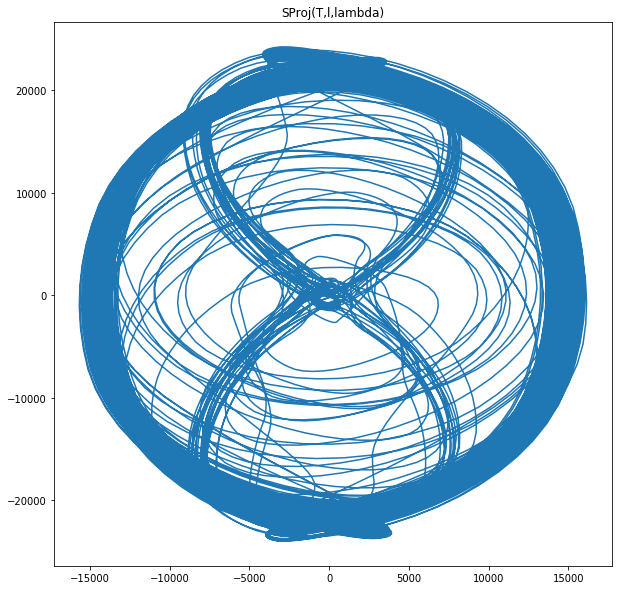

In [5]:
plt.figure(figsize=(10,10))
plt.plot(s2g.graph['proj_A']['0'],s2g.graph['proj_A']['1'])
plt.title("SProj(T,l,lambda)")

### Visualization of the graph

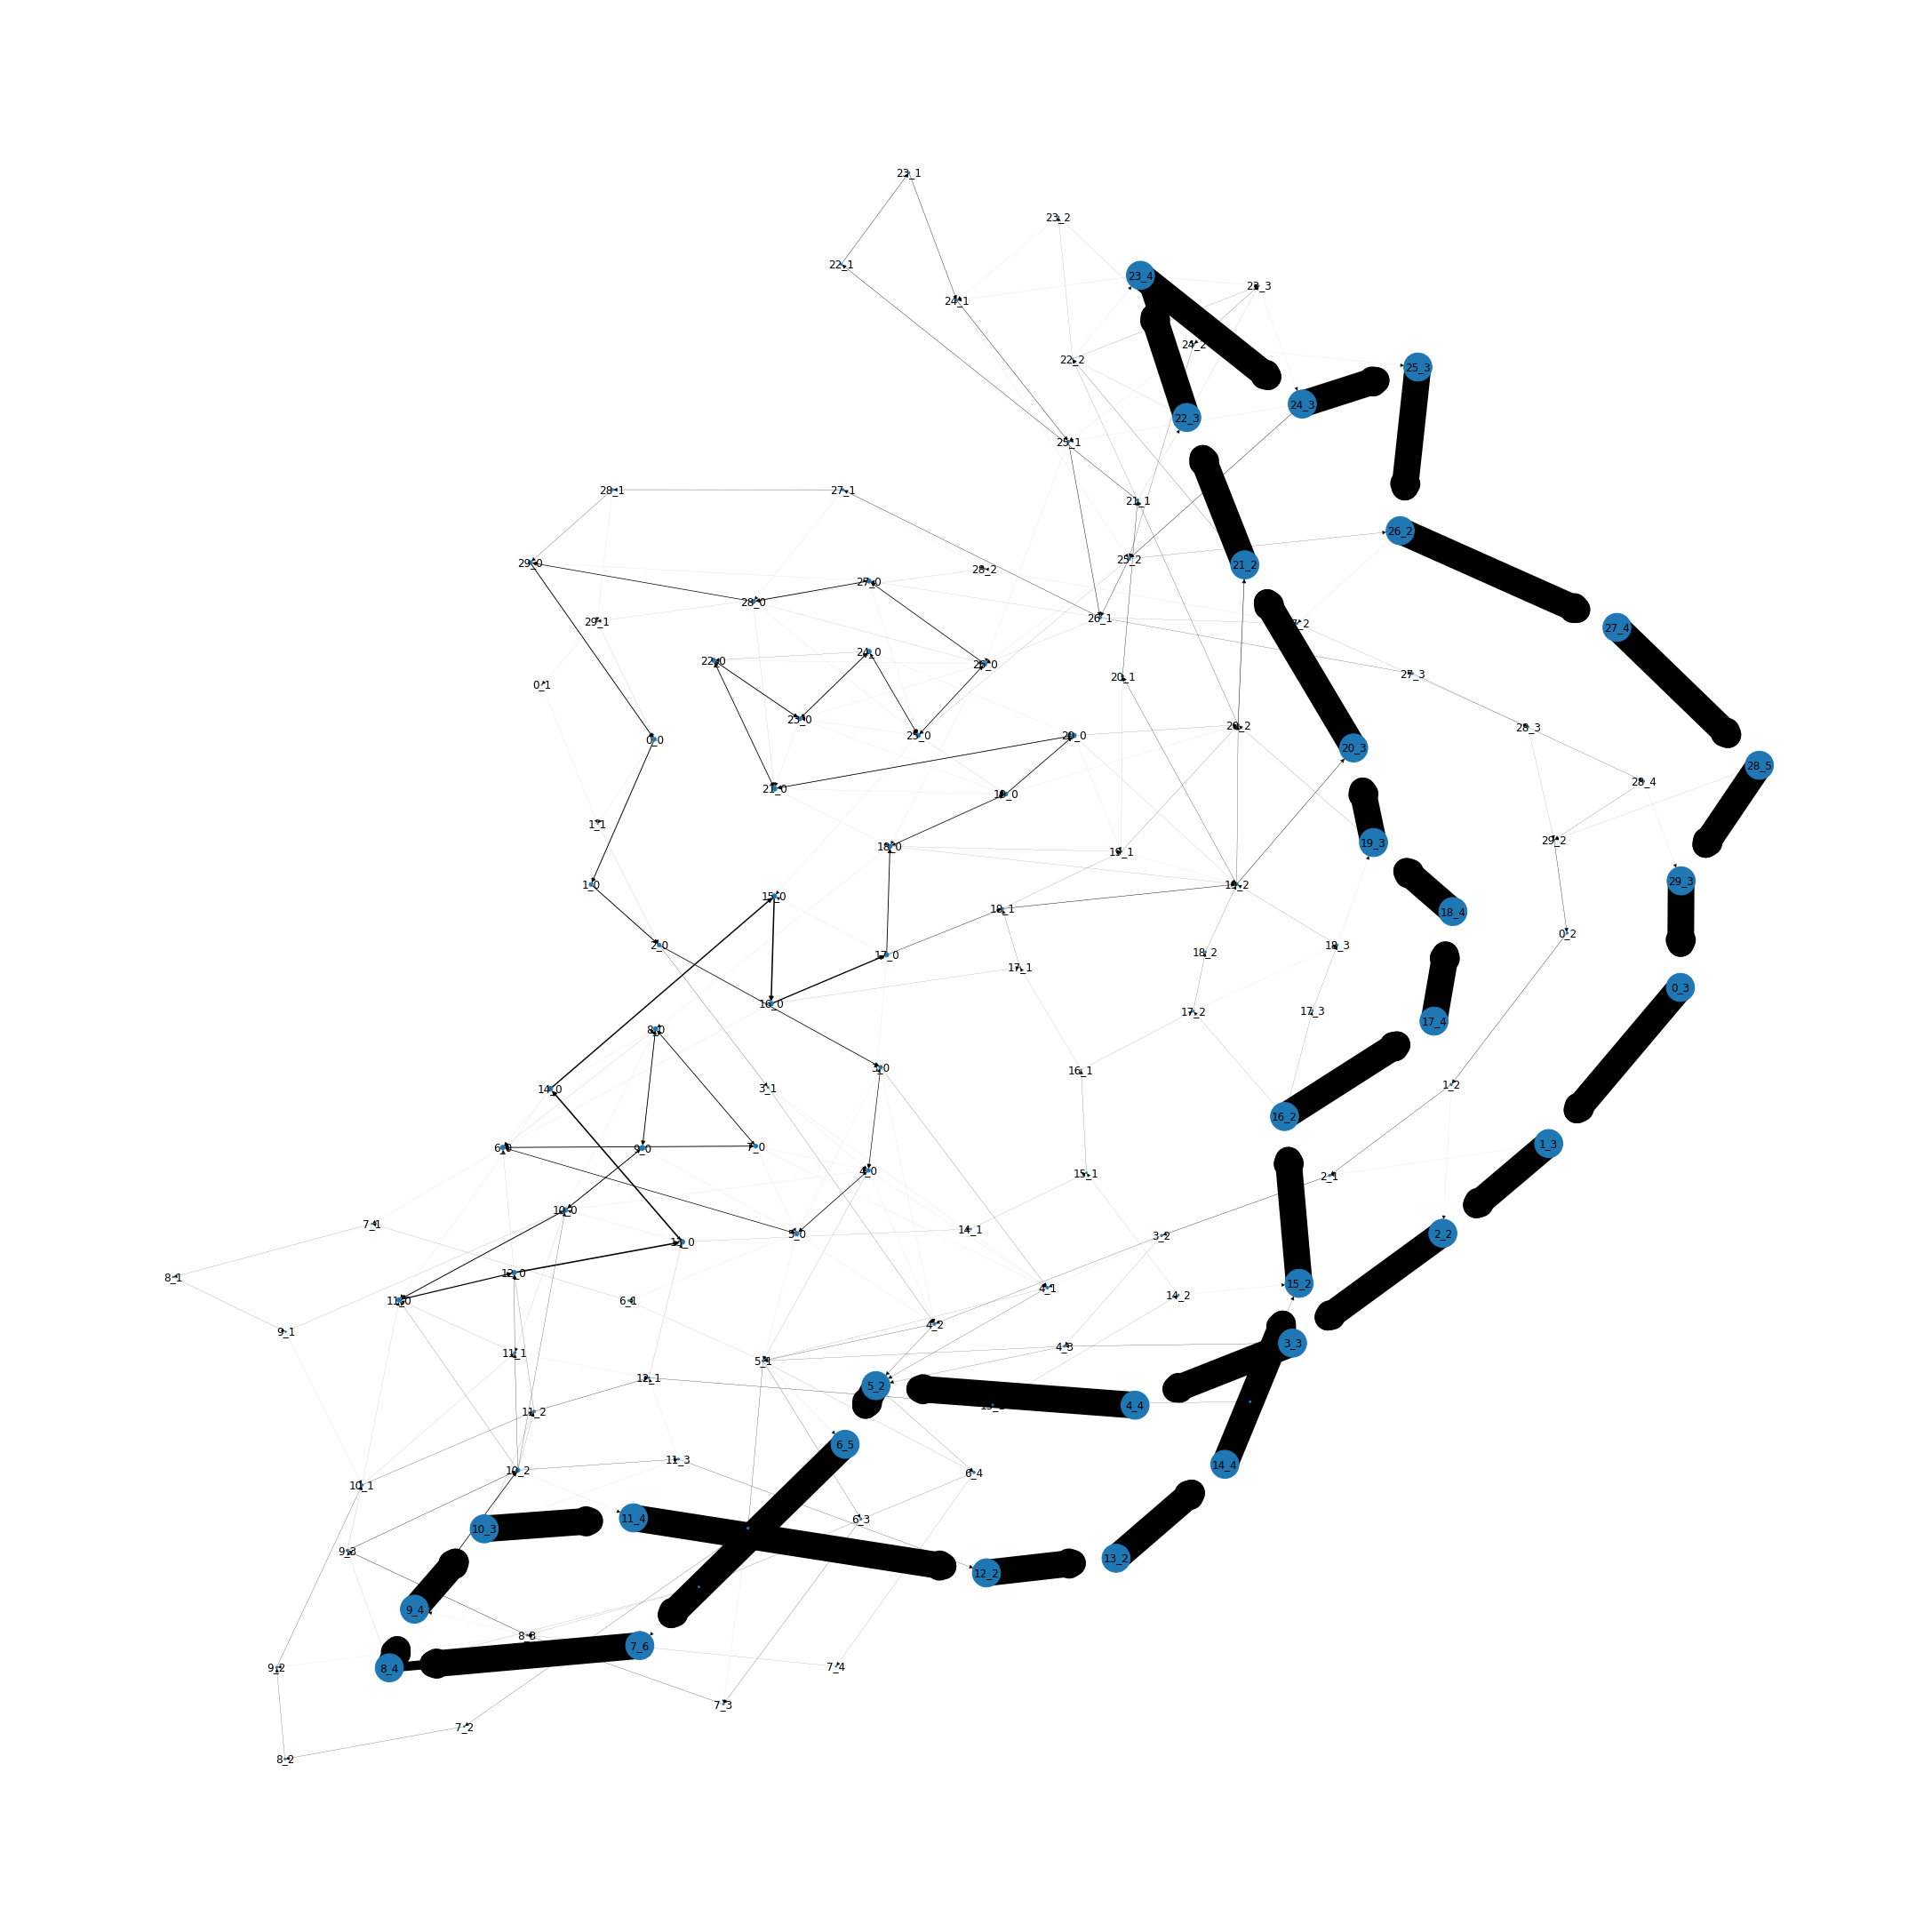

In [6]:
s2g.plot_graph()

## Anomalies detection

In [7]:
s2g.score(query_length)

### Vizualisation of the full time series

(0, 102966)

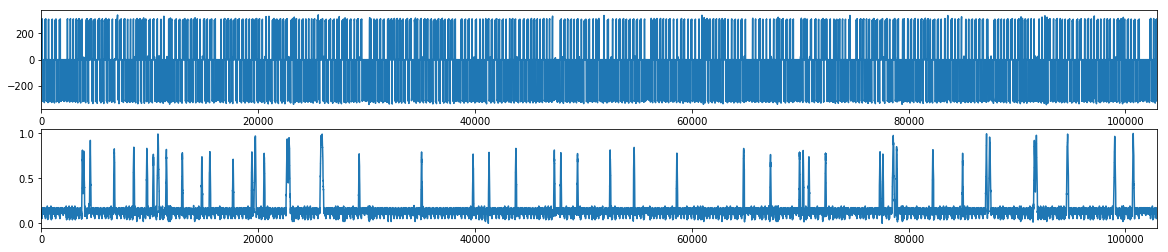

In [8]:
fig,ax = plt.subplots(2,1,figsize=(20,4))
ax[0].plot(df[0].values[0:len(s2g.all_score)])
ax[1].plot(s2g.all_score)
ax[0].set_xlim(0,len(s2g.all_score))
ax[1].set_xlim(0,len(s2g.all_score))

### Visualization of a snippet

(22500, 30000)

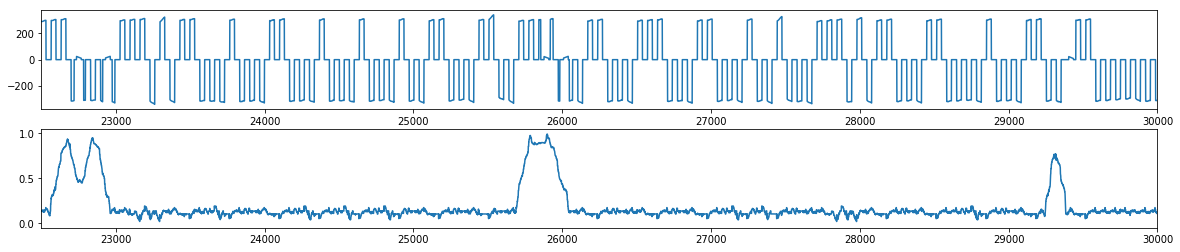

In [9]:
fig,ax = plt.subplots(2,1,figsize=(20,4))
ax[0].plot(df[0].values[0:len(s2g.all_score)])
ax[1].plot(s2g.all_score)
ax[0].set_xlim(22500,30000)
ax[1].set_xlim(22500,30000)